<a href="https://colab.research.google.com/github/jjgranadat/Semillero_SOFA/blob/main/QAM_Modulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Generación de secuencia de símbolos

In [ ]:
Ns= 10000
Mod=16 #16QAM
Symbols_tx = np.random.randint(Mod, size=Ns)
df_sym_tx= pd.DataFrame(Symbols_tx)
print(Symbols_tx)
df_sym_tx.head()

[ 2 10  0 ... 12  4  5]


,0
0,2
1,10
2,0
3,13
4,2


## Modulación 16QAM

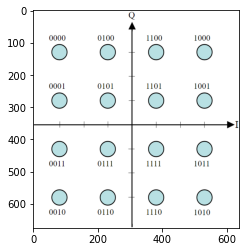

In [ ]:
image = mpimg.imread("16QAM_GC.png")
plt.imshow(image)

In [ ]:
mod_dict = {0:-3+3j, #0000
            1:-3+1j, #0001
            2:-3-3j, #0010
            3:-3-1j, #0011
            4:-1+3j, #0100
            5:-1+1j, #0101
            6:-1-3j, #0110
            7:-1-1j, #0111
            8:3+3j, #1000
            9:3+1j, #1001
            10:3-3j, #1010
            11:3-1j, #1011
            12:1+3j, #1100
            13:1+1j, #1101
            14:1-3j, #1110
            15:1-1j} #1111

In [ ]:
#Modulación reemplazando símbolos por valores complejos (opción 1)
df_sym_mod = df_sym_tx.replace(mod_dict)
df_sym_mod.head()

,0
0,-3.0-3.0j
1,3.0-3.0j
2,-3.0+3.0j
3,1.0+1.0j
4,-3.0-3.0j


In [ ]:
#Modulación reemplazando símbolos por valores complejos - mapeo (opción 2)
df_sym_mod2 = df_sym_tx.iloc[:,0].map(mod_dict)
df_sym_mod2.head(20)

0    -3.0-3.0j
1     3.0-3.0j
2    -3.0+3.0j
3     1.0+1.0j
4    -3.0-3.0j
5    -3.0-1.0j
6    -3.0+1.0j
7     1.0-3.0j
8     1.0-3.0j
9     3.0-1.0j
10   -1.0-3.0j
11    3.0-3.0j
12    1.0+3.0j
13   -3.0+1.0j
14    3.0-1.0j
15   -3.0-3.0j
16   -3.0-3.0j
17    1.0+3.0j
18   -3.0-1.0j
19   -1.0+3.0j
Name: 0, dtype: complex128

## Demodulador Símbolos 16QAM

In [ ]:
def demapper_sym(symbols_I, symbols_Q, Ns, threshold = 2.0):
   symbol = []
   for i in range(Ns):
        if symbols_I[i] <= -threshold and symbols_Q[i] >= threshold: #-3+3j
            symbol.append(0)
        elif symbols_I[i] <= -threshold and symbols_Q[i] >= 0 and symbols_Q[i] <= threshold: #-3+1j
            symbol.append(1)
        elif symbols_I[i] <= -threshold and symbols_Q[i] <= 0 and symbols_Q[i] >= -threshold: #-3-j
            symbol.append(3)
        elif symbols_I[i] <= -threshold and symbols_Q[i] <= -threshold: #-3-3j
            symbol.append(2)
        elif symbols_I[i] >= -threshold and symbols_I[i] <= 0 and symbols_Q[i] >= threshold: #-1+3j
            symbol.append(4)
        elif symbols_I[i] >= -threshold and symbols_I[i] <= 0 and symbols_Q[i] >= 0 and symbols_Q[i] <= threshold: #-1+j
            symbol.append(5)
        elif symbols_I[i] >= -threshold and symbols_I[i] <= 0 and symbols_Q[i] <= 0 and symbols_Q[i] >= -threshold: #-1-j
            symbol.append(7)
        elif symbols_I[i] >= -threshold and symbols_I[i] <= 0 and symbols_Q[i] <= -threshold: #-1-3j
            symbol.append(6)
        elif symbols_I[i] >= 0 and symbols_I[i] <= threshold and symbols_Q[i] >= threshold: #1+3j
            symbol.append(12)
        elif symbols_I[i] >= 0 and symbols_I[i] <= threshold and symbols_Q[i] >= 0 and symbols_Q[i] <= threshold: #1+j
            symbol.append(13)
        elif symbols_I[i] >= 0 and symbols_I[i] <= threshold and symbols_Q[i] <= 0 and symbols_Q[i] >= -threshold: #1-j
            symbol.append(15)
        elif symbols_I[i] >= 0 and symbols_I[i] <= threshold and symbols_Q[i] <= -threshold: #1-3j
            symbol.append(14)
        elif symbols_I[i] >= threshold and symbols_Q[i] >= threshold: #3+3j
            symbol.append(8)
        elif symbols_I[i] >= threshold and symbols_Q[i] >= 0 and symbols_Q[i] <= threshold: #3+1j
            symbol.append(9)
        elif symbols_I[i] >= threshold and symbols_Q[i] <= 0 and symbols_Q[i] >= -threshold: #3-1j
            symbol.append(11)
        elif symbols_I[i] >= threshold and symbols_Q[i] <= -threshold: #3-3j
            symbol.append(10)
   return(symbol)

In [ ]:
sym_tx= demapper_sym(np.real(df_sym_mod2), np.imag(df_sym_mod2), len(df_sym_mod2), threshold = 2.0)
print(sym_tx[0:10])
print(Symbols_tx[0:10])

[2, 10, 0, 13, 2, 3, 1, 14, 14, 11]
[ 2 10  0 13  2  3  1 14 14 11]


In [ ]:
Xr = np.real(df_sym_mod2)
Xi = np.imag(df_sym_mod2)

In [ ]:
# Adición de ruido blanco Gaussiano (AWGN)

target_snr_db = 16
Xr_avg_p = np.mean(Xr**2)
Xr_avg_db = 10 * np.log10(Xr_avg_p)
#print(Xr_avg_db)
noise_avg_db_r = Xr_avg_db - target_snr_db
noise_avg_p_r = 10 ** (noise_avg_db_r / 10)
mean_noise = 0
noise_r = np.random.normal(mean_noise, np.sqrt(noise_avg_p_r), len(Xr))
Xr_ch = Xr + noise_r

Xi_avg_p = np.mean(Xi**2)
Xi_avg_db = 10 * np.log10(Xi_avg_p)
#print(Xi_avg_db)
noise_avg_db_i = Xr_avg_db - target_snr_db
noise_avg_p_i = 10 ** (noise_avg_db_i / 10)
noise_i = np.random.normal(mean_noise, np.sqrt(noise_avg_p_i), len(Xi))
Xi_ch = Xi + noise_i

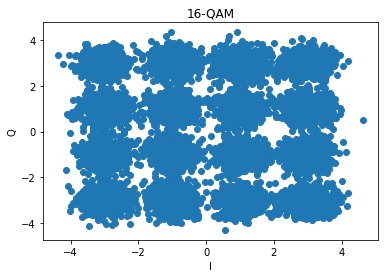

In [ ]:
plt.plot(Xi_ch, Xr_ch, 'o')
plt.xlabel('I')
plt.ylabel('Q')
plt.title('16-QAM')
plt.show()

In [ ]:
sym_rx= demapper_sym(Xr_ch, Xi_ch, len(Xr_ch), threshold = 2.0)
print(sym_rx[0:10])
print(Symbols_tx[0:10])

[2, 10, 0, 13, 2, 3, 1, 14, 14, 11]
[ 2 10  0 13  2  3  1 14 14 11]


In [ ]:
def SER(sym_rx, Symbols_tx, Ns):
    error = 0
    for i in range(Ns):
        if sym_rx[i] == Symbols_tx[i]:
            error = error
        else:
            error= error + 1
    SER = error/Ns
    return([SER, error])

In [ ]:
SER, error = SER(sym_rx, Symbols_tx, Ns)
print(SER)
print(error)

0.0059
59
